In [4]:
import warnings

warnings.filterwarnings("ignore")

In [5]:
import tensorflow as tf
import os
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [ ]:
mainDirectory = "C:/Users/laksh/Downloads/Sobel_8/Sobel_8/"

In [ ]:
imageHeight = 256
imageWidth = 256

# Types of the tumours and its directory name
strokeCategories = ["ischemic_sobel8", "normal_sobel8"]

ischemic = []
normal = []
for classess in strokeCategories:
    pathDirectory = os.path.join(mainDirectory, classess)
    for image in os.listdir(path=pathDirectory.replace("\\", "/")):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       image_array = cv2.resize(image_array, (imageHeight, imageWidth))
       if classess == "ischemic_sobel8":
         ischemic.append(image_array)
       else:
        normal.append(image_array)

# Converting the lists into numpy arrays for tumour types
ischemicData = np.array(ischemic)
normalData = np.array(normal)

In [ ]:
ischemicData.shape

(17287, 256, 256, 3)

In [ ]:
imageHeight = 256
imageWidth = 256

# Types of the tumours and its directory name
strokeCategories = ["ischemic_sobel8", "normal_sobel8"]

ischemic = []
normal = []
for classess in strokeCategories:
    pathDirectory = os.path.join(mainDirectory, classess)
    for image in os.listdir(path=pathDirectory.replace("\\", "/")):
       # Taking images of all image directories
       image_array = cv2.imread(os.path.join(pathDirectory, image))
       image_array = cv2.resize(image_array, (imageHeight, imageWidth))
       if classess == "normal_sobel8":
            normal.append(image_array)

normalData = np.array(normal)

In [ ]:
# Types of the tumours and its directory name
strokeCategories = ["ischemic_sobel8", "normal_sobel8"]

# Combine image data and labels
allImages = np.concatenate([ischemicData, normalData], axis=0)

# Create corresponding labels based on the class names
allLabels = np.concatenate([
    np.full(len(ischemicData), "Ischemic"),       # Label for ischemic
    np.full(len(normalData), "Normal"), # Label for normal
], axis=0)

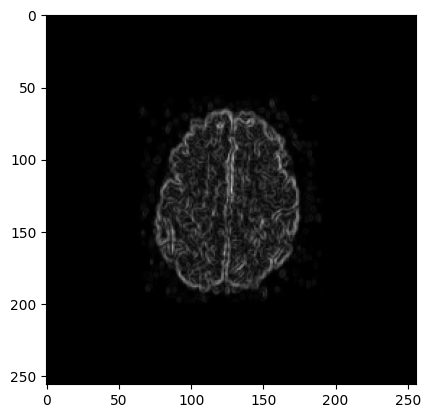

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(normalData[0])

In [ ]:
resizedImages = [cv2.resize(img, (256, 256)) for img in allImages]
allImages = np.array(resizedImages)

In [ ]:
import gc
gc.collect()

from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(allImages, allLabels, test_size=0.3, random_state=4)

In [ ]:
import pandas as pd

dt = pd.DataFrame(train_y)

In [ ]:
dt[0].value_counts()

Ischemic    12077
Normal      11699
Name: 0, dtype: int64

In [ ]:
dt = pd.DataFrame(test_y)
dt[0].value_counts()

Ischemic    5210
Normal      4981
Name: 0, dtype: int64

In [ ]:
from sklearn.preprocessing import LabelEncoder
# Use fit_transform on the training set
labelEncoder = LabelEncoder()
train_y_encoded = labelEncoder.fit_transform(train_y)

# Use transform on the test set
test_y_encoded = labelEncoder.transform(test_y)

# Main directory to store training and testing data
mainDataDirectory = "C:/Users/laksh/Downloads/Sobel_8/Stroke_images"

# Making two directories for both training and testing data sets
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Categories of tumour classification
tumourCategories = ["Ischemic", "Normal"]

# Creating the subdirectories by checking whether they already exist
for category in tumourCategories:
    os.makedirs(os.path.join(trainDirectory, category), exist_ok=True)
    os.makedirs(os.path.join(testDirectory, category), exist_ok=True)

# Save training images
for i in range(len(train_x)):
    category = tumourCategories[int(train_y_encoded[i])]
    filename = f"{category}_train_{i}.jpg"
    filepath = os.path.join(trainDirectory, category, filename)
    cv2.imwrite(filepath, train_x[i])

# Save testing images
# Save testing images
for i in range(len(test_x)):
    category = tumourCategories[int(test_y_encoded[i])]
    filename = f"{category}_test_{i}.jpg"
    filepath = os.path.join(testDirectory, category, filename)
    cv2.imwrite(filepath, test_x[i])

# Perform garbage collection to free up memory
gc.collect()

In [2]:
import gc
# Categories of tumour classification
tumourCategories = ["Ischemic", "Normal"]
# Main directory where data is saved
mainDataDirectory = "C:/Users/laksh/Downloads/Sobel_8/Stroke_images"

# Directories for training and testing data
trainDirectory = os.path.join(mainDataDirectory, 'Train')
testDirectory = os.path.join(mainDataDirectory, 'Test')

# Function to read images from a directory
def read_images_from_directory(directory):
    images = []
    labels = []
    for category in tumourCategories:
        category_path = os.path.join(directory, category)
        label = tumourCategories.index(category)
        for filename in os.listdir(category_path):
            image_path = os.path.join(category_path, filename)
            image = cv2.imread(image_path)
            # You may need to resize or preprocess the images here if necessary
            images.append(image)
            if label == 0:
                labels.append("Ischemic")
            elif label == 1:
                labels.append("Normal")

    return images, labels

# Read training images
train_x, train_y = read_images_from_directory(trainDirectory)

# Read testing images
test_x, test_y = read_images_from_directory(testDirectory)

# Convert the lists to numpy arrays
train_x = np.array(train_x)
train_y = np.array(train_y)
test_x = np.array(test_x)
test_y = np.array(test_y)

# Perform garbage collection to free up memory
gc.collect()

0

Text(0.5, 1.0, 'Ischemic')

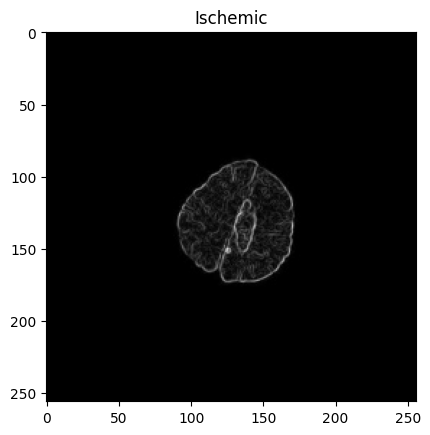

In [ ]:
plt.imshow(train_x[0])
plt.title(train_y[0])

In [ ]:
# To get the count of each class images
unique_classes, class_counts = np.unique(train_y, return_counts=True)

for class_label, count in zip(unique_classes, class_counts):
    print(f"{class_label}: {count} samples")

Ischemic: 12077 samples
Normal: 11699 samples


In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG16
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming you have the following variables defined: train_x, test_x, train_y, test_y

# Convert labels to one-hot encoded format
train_y_one_hot = to_categorical(train_y, num_classes=4)  # Adjust num_classes based on your dataset
test_y_one_hot = to_categorical(test_y, num_classes=4)

# Load pre-trained VGG16 model
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y_one_hot, epochs=10, batch_size=16, validation_data=(test_x, test_y_one_hot))

Epoch 1/10
1486/1486 [==============================] - 6713s 5s/step - loss: 0.5304 - accuracy: 0.9195 - val_loss: 0.0799 - val_accuracy: 0.9730
Epoch 2/10
1486/1486 [==============================] - 6612s 4s/step - loss: 0.1499 - accuracy: 0.9511 - val_loss: 0.0705 - val_accuracy: 0.9772
Epoch 3/10
1486/1486 [==============================] - 6594s 4s/step - loss: 0.1284 - accuracy: 0.9574 - val_loss: 0.0867 - val_accuracy: 0.9718
Epoch 4/10
1486/1486 [==============================] - 6625s 4s/step - loss: 0.1184 - accuracy: 0.9642 - val_loss: 0.0581 - val_accuracy: 0.9810
Epoch 5/10
1486/1486 [==============================] - 6569s 4s/step - loss: 0.1023 - accuracy: 0.9682 - val_loss: 0.0410 - val_accuracy: 0.9839
Epoch 6/10
1486/1486 [==============================] - 6569s 4s/step - loss: 0.0869 - accuracy: 0.9682 - val_loss: 0.0357 - val_accuracy: 0.9879
Epoch 7/10
1486/1486 [==============================] - 6586s 4s/step - loss: 0.0826 - accuracy: 0.9714 - val_loss: 0.0388 -

In [ ]:
# Save the model if needed
model.save('ischemic_stroke_vgg16.h5')

In [ ]:
from keras.models import load_model

# Load the model
model = load_model('ischemic_stroke_vgg16.h5')

# Print the model summary
model.summary()

In [ ]:
import numpy as np

label_mapping = {0: 'Ischemic', 1: 'Normal'}
image = np.expand_dims(train_x[11750], axis=0)
class_name = np.argmax(model.predict(image))
label_mapping[class_name]

1/1 [==============================] - 1s 607ms/step


'Ischemic'

Text(0.5, 1.0, 'Ischemic')

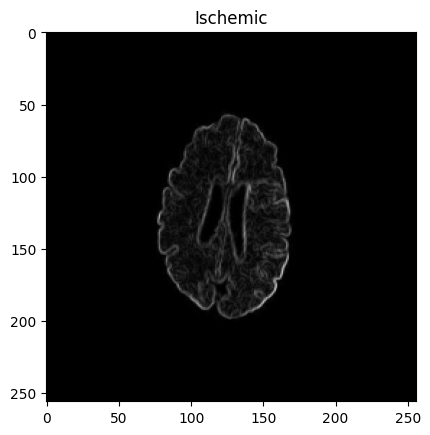

In [ ]:
plt.imshow(train_x[11750])
plt.title(train_y[11750])

In [ ]:
image = np.expand_dims(train_x[1596], axis=0)
class_name = np.argmax(model.predict(image))
label_mapping[class_name]

1/1 [==============================] - 0s 383ms/step


'Ischemic'

Text(0.5, 1.0, 'Ischemic')

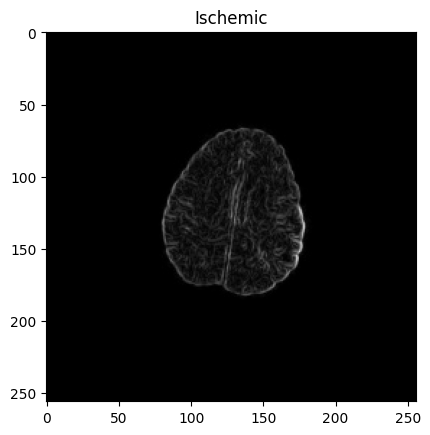

In [ ]:
plt.imshow(train_x[1596])
plt.title(train_y[1586])

In [ ]:
image = np.expand_dims(test_x[10000], axis=0)
class_name = np.argmax(model.predict(image))
label_mapping[class_name]

1/1 [==============================] - 0s 401ms/step


'Normal'

Text(0.5, 1.0, 'Normal')

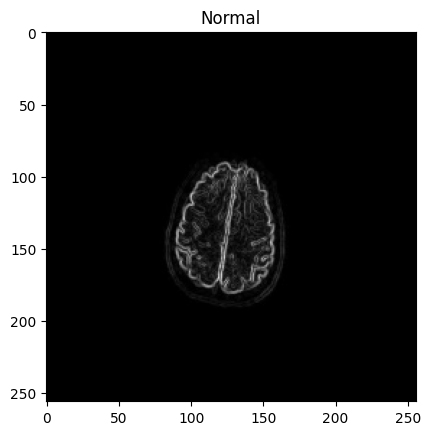

In [ ]:
plt.imshow(test_x[10000])
plt.title(test_y[10000])

In [8]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical

# Assuming train_y contains string labels like 'Ischemic', 'Non-Ischemic', etc.
label_encoder = LabelEncoder()
test_y_encoded = label_encoder.fit_transform(test_y)

# Convert labels to one-hot encoded format
test_y_one_hot = to_categorical(test_y_encoded, num_classes=4)  # Adjust num_classes based on your dataset

# Evaluate the model on the test data
eval_result = model.evaluate(test_x, test_y_one_hot)

# Print the evaluation results
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])


319/319 [==============================] - 2439s 8s/step - loss: 0.1109 - accuracy: 0.9644
Test Loss: 0.11090575903654099
Test Accuracy: 0.9643803238868713


In [9]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Assuming you have the following variables defined: test_x, test_y_one_hot
# Map string labels to integer labels
label_mapping = {'Ischemic': 0, 'Normal': 1}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

319/319 [==============================] - 2387s 7s/step


In [17]:
from sklearn.metrics import classification_report
import pandas as pd

disease = {0:'Ischemic', 1:'Normal'}

true_classes = test_y
# Mapping actual and predicted classes to disease names
actual_classes = test_y
predict_classes = [disease[x] for x in predicted_classes]

# Generate classification report
report = classification_report(actual_classes, predict_classes, output_dict=True)

# Convert classification report to DataFrame
classification_df = pd.DataFrame(report)

classification_df

,Ischemic,Normal,accuracy,macro avg,weighted avg
precision,0.965431,0.963283,0.96438,0.964357,0.964381
recall,0.964875,0.963863,0.96438,0.964369,0.964380
f1-score,0.965153,0.963573,0.96438,0.964363,0.964381
support,5210.000000,4981.000000,0.96438,10191.000000,10191.000000


In [ ]:
import pandas as pd
dt = pd.DataFrame(test_y)
dt[0].value_counts()

Ischemic    5210
Normal      4981
Name: 0, dtype: int64

In [ ]:
test_x.shape, test_y_encoded.shape

((10191, 256, 256, 3), (23776,))

In [ ]:
test_x.shape, test_y.shape

((10191, 256, 256, 3), (10191,))

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Assuming you have the following variables defined: test_x, test_y_one_hot
# Map string labels to integer labels
label_mapping = {'Ischemic': 0, 'Normal': 1}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to integers
true_classes = np.argmax(test_y_one_hot, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

319/319 [==============================] - 2704s 8s/step


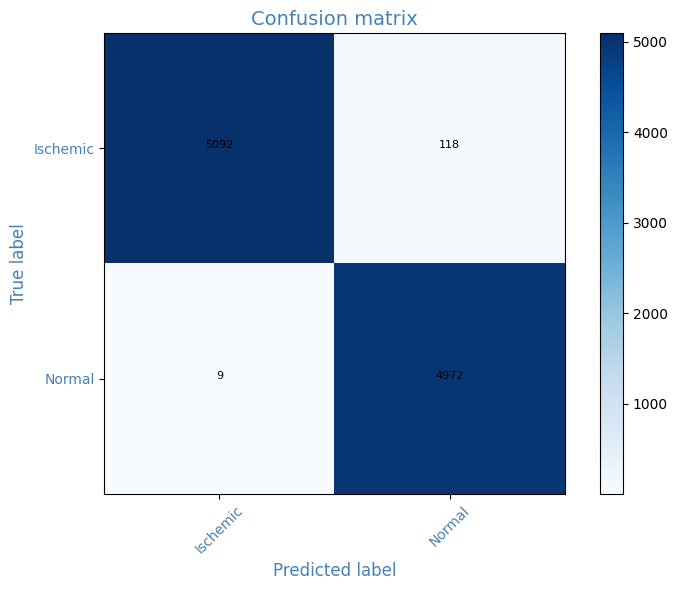

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):

    title = 'Confusion matrix'
    if normalize:
        y_true = y_true.astype('float') / y_true.sum(axis=0, keepdims=True)
        title = 'Normalized confusion matrix'

    # Define custom colors for the plot
    blue, green = "#4682B4", "#008000"

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.imshow(confusion_matrix(y_true, y_pred), interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14, color=blue)  # Adjust title fontsize and color
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10, color=blue)  # Use blue for the ticks
    plt.yticks(tick_marks, classes, fontsize=10, color=blue)  # Use blue for the ticks

    fmt = '.2f' if normalize else 'd'
    thresh = y_true.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, format(y_true[i] if normalize else cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if y_true[i] > thresh else "black", fontsize=8)

    plt.ylabel('True label', fontsize=12, color=blue)  # Use blue for the labels
    plt.xlabel('Predicted label', fontsize=12, color=blue)  # Use blue for the labels
    plt.tight_layout()

# Plot non-normalized confusion matrix with a blue and green theme (Blues)
plot_confusion_matrix(true_classes, predicted_classes, classes=label_mapping.keys(), normalize=False, cmap=plt.cm.Blues)

plt.show()

In [ ]:
eval_result

[0.11090575158596039, 0.9643803238868713]

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import VGG19
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming you have the following variables defined: train_x, test_x, train_y, test_y
# Map string labels to integer labels
label_mapping = {'Ischemic': 0, 'Normal': 1}

# Convert string labels to integer labels
train_y = [label_mapping[label] for label in train_y]
test_y = [label_mapping[label] for label in test_y]

# Convert labels to one-hot encoded format
train_y_one_hot = to_categorical(train_y, num_classes=4)  # Adjust num_classes based on your dataset
test_y_one_hot = to_categorical(test_y, num_classes=4)

# Load pre-trained VGG19 model
base_model = VGG19(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y_one_hot, epochs=10, batch_size=8, validation_data=(test_x, test_y_one_hot))

Epoch 1/10
2972/2972 [==============================] - 10955s 4s/step - loss: 0.4574 - accuracy: 0.9160 - val_loss: 0.0855 - val_accuracy: 0.9658
Epoch 2/10
2972/2972 [==============================] - 8925s 3s/step - loss: 0.1691 - accuracy: 0.9367 - val_loss: 0.0628 - val_accuracy: 0.9752
Epoch 3/10
2972/2972 [==============================] - 10958s 4s/step - loss: 0.1358 - accuracy: 0.9479 - val_loss: 0.0590 - val_accuracy: 0.9794
Epoch 4/10
2972/2972 [==============================] - 12586s 4s/step - loss: 0.1189 - accuracy: 0.9521 - val_loss: 0.0721 - val_accuracy: 0.9731
Epoch 5/10
2972/2972 [==============================] - 11295s 4s/step - loss: 0.1186 - accuracy: 0.9563 - val_loss: 0.0527 - val_accuracy: 0.9820
Epoch 6/10
2972/2972 [==============================] - 8914s 3s/step - loss: 0.1113 - accuracy: 0.9540 - val_loss: 0.0322 - val_accuracy: 0.9871
Epoch 7/10
2972/2972 [==============================] - 8909s 3s/step - loss: 0.0932 - accuracy: 0.9572 - val_loss: 0.04

In [ ]:
# Save the model if needed
model.save('ischemic_stroke_vgg19.h5')

In [20]:
from keras.models import load_model

# Load the model
model = load_model('ischemic_stroke_vgg19.h5')

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 8, 8, 512)         20024384  
                                                                 
 flatten (Flatten)           (None, 32768)             0         
                                                                 
 dense (Dense)               (None, 256)               8388864   
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 28414276 (108.39 MB)
Trainable params: 8389892 (32.00 MB)
Non-trainable params: 20024384 (76.39 MB)
_________________________________________________________________


In [ ]:
import numpy as np

label_mapping = {0: 'Ischemic', 1: 'Normal'}
image = np.expand_dims(train_x[11750], axis=0)
class_name = np.argmax(model.predict(image))
label_mapping[class_name]

1/1 [==============================] - 1s 687ms/step


'Ischemic'

Text(0.5, 1.0, '0')

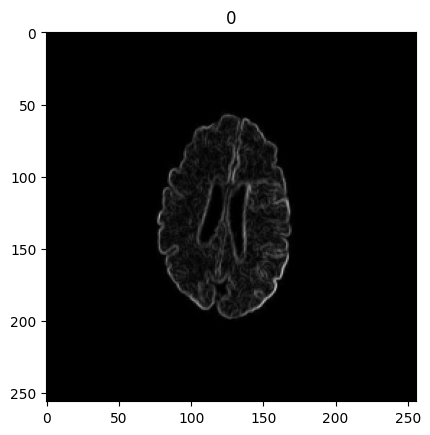

In [ ]:
plt.imshow(train_x[11750])
plt.title(train_y[11750])

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Assuming you have the following variables defined: test_x, test_y_one_hot
# Map string labels to integer labels
label_mapping = {'Ischemic': 0, 'Normal': 1}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to integers
true_classes = np.argmax(test_y_one_hot, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

319/319 [==============================] - 2490s 8s/step


In [21]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Assuming you have the following variables defined: test_x, test_y_one_hot
# Map string labels to integer labels
label_mapping = {'Ischemic': 0, 'Normal': 1}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

319/319 [==============================] - 2369s 7s/step


In [22]:
from sklearn.metrics import classification_report
import pandas as pd

disease = {0:'Ischemic', 1:'Normal'}


# Mapping actual and predicted classes to disease names
actual_classes = test_y
predict_classes = [disease[x] for x in predicted_classes]

# Generate classification report
report = classification_report(actual_classes, predict_classes, output_dict=True)

# Convert classification report to DataFrame
classification_df = pd.DataFrame(report)

classification_df

,Ischemic,Normal,accuracy,macro avg,weighted avg
precision,0.995709,0.979265,0.987538,0.987487,0.987672
recall,0.979846,0.995583,0.987538,0.987715,0.987538
f1-score,0.987714,0.987357,0.987538,0.987535,0.987539
support,5210.000000,4981.000000,0.987538,10191.000000,10191.000000


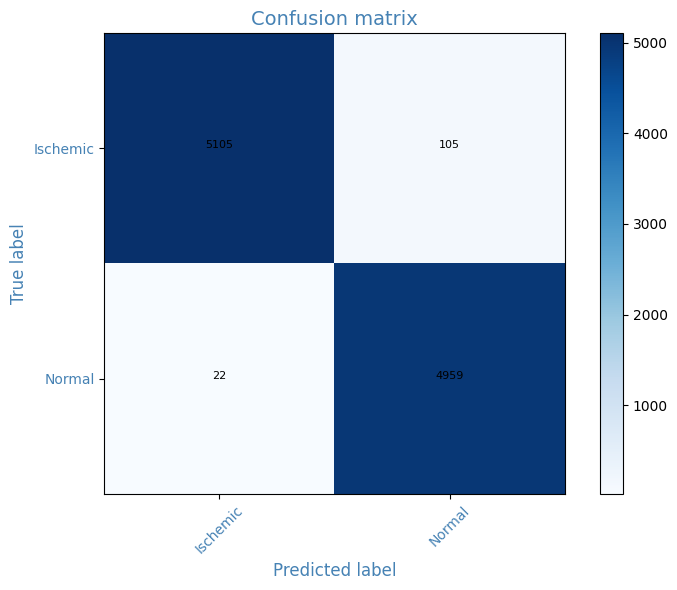

In [ ]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):

    title = 'Confusion matrix'
    if normalize:
        y_true = y_true.astype('float') / y_true.sum(axis=0, keepdims=True)
        title = 'Normalized confusion matrix'

    # Define custom colors for the plot
    blue, green = "#4682B4", "#008000"

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.imshow(confusion_matrix(y_true, y_pred), interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14, color=blue)  # Adjust title fontsize and color
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10, color=blue)  # Use blue for the ticks
    plt.yticks(tick_marks, classes, fontsize=10, color=blue)  # Use blue for the ticks

    fmt = '.2f' if normalize else 'd'
    thresh = y_true.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, format(y_true[i] if normalize else cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if y_true[i] > thresh else "black", fontsize=8)

    plt.ylabel('True label', fontsize=12, color=blue)  # Use blue for the labels
    plt.xlabel('Predicted label', fontsize=12, color=blue)  # Use blue for the labels
    plt.tight_layout()

# Plot non-normalized confusion matrix with a blue and green theme (Blues)
plot_confusion_matrix(true_classes, predicted_classes, classes=label_mapping.keys(), normalize=False, cmap=plt.cm.Blues)

plt.show()

In [4]:
import tensorflow as tf
from tensorflow.keras import layers, models, optimizers
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split

# Assuming you have the following variables defined: train_x, test_x, train_y, test_y
# Map string labels to integer labels
label_mapping = {'Ischemic': 0, 'Normal': 1}

# Convert string labels to integer labels
train_y = [label_mapping[label] for label in train_y]
test_y = [label_mapping[label] for label in test_y]

# Convert labels to one-hot encoded format
train_y_one_hot = to_categorical(train_y, num_classes=4)  # Adjust num_classes based on your dataset
test_y_one_hot = to_categorical(test_y, num_classes=4)

# Load pre-trained ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(256, 256, 3))

# Freeze the layers
for layer in base_model.layers:
    layer.trainable = False

# Build the model
model = models.Sequential()
model.add(base_model)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))  # Assuming 4 classes

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(train_x, train_y_one_hot, epochs=10, batch_size=8, validation_data=(test_x, test_y_one_hot))

Epoch 1/10
2972/2972 [==============================] - 5715s 2s/step - loss: 0.9048 - accuracy: 0.8970 - val_loss: 0.1447 - val_accuracy: 0.9491
Epoch 2/10
2972/2972 [==============================] - 6183s 2s/step - loss: 0.2723 - accuracy: 0.8836 - val_loss: 0.1226 - val_accuracy: 0.9546
Epoch 3/10
2972/2972 [==============================] - 3542s 1s/step - loss: 0.2351 - accuracy: 0.9037 - val_loss: 0.0981 - val_accuracy: 0.9569
Epoch 4/10
2972/2972 [==============================] - 3585s 1s/step - loss: 0.1918 - accuracy: 0.9121 - val_loss: 0.1089 - val_accuracy: 0.9631
Epoch 5/10
2972/2972 [==============================] - 3609s 1s/step - loss: 0.2089 - accuracy: 0.8933 - val_loss: 0.0820 - val_accuracy: 0.9617
Epoch 6/10
2972/2972 [==============================] - 3591s 1s/step - loss: 0.2110 - accuracy: 0.8867 - val_loss: 0.0781 - val_accuracy: 0.9648
Epoch 7/10
2972/2972 [==============================] - 3652s 1s/step - loss: 0.1994 - accuracy: 0.8908 - val_loss: 0.0665 -

In [7]:
# Save the model if needed
model.save('ischemic_stroke_resnet50.h5')

In [23]:
from keras.models import load_model

# Load the model
model = load_model('ischemic_stroke_resnet50.h5')

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 8, 8, 2048)        23587712  
                                                                 
 flatten (Flatten)           (None, 131072)            0         
                                                                 
 dense (Dense)               (None, 256)               33554688  
                                                                 
 dropout (Dropout)           (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 4)                 1028      
                                                                 
Total params: 57143428 (217.98 MB)
Trainable params: 33555716 (128.00 MB)
Non-trainable params: 23587712 (89.98 MB)
_________________________________________________________________


In [10]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Assuming you have the following variables defined: test_x, test_y_one_hot
# Map string labels to integer labels
label_mapping = {'Ischemic': 0, 'Normal': 1}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

# Convert one-hot encoded test labels back to integers
true_classes = np.argmax(test_y_one_hot, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(true_classes, predicted_classes)

319/319 [==============================] - 809s 3s/step


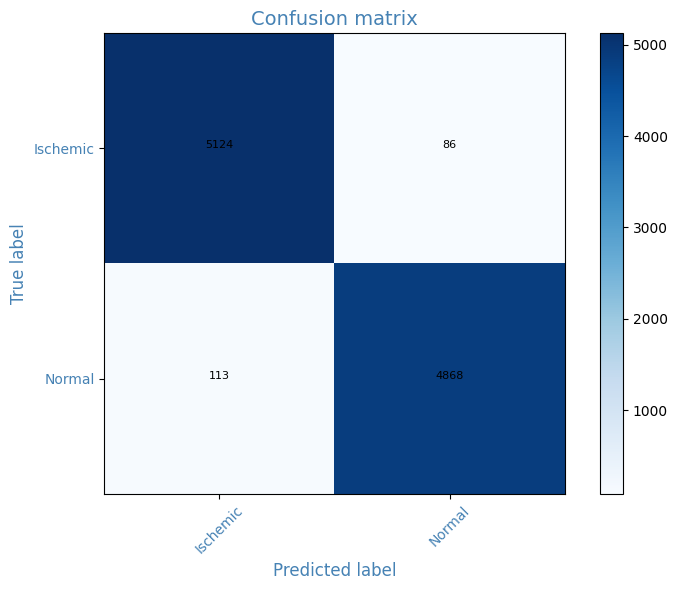

In [11]:
import numpy as np
import itertools
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, classes, normalize=False, cmap=plt.cm.Blues):

    title = 'Confusion matrix'
    if normalize:
        y_true = y_true.astype('float') / y_true.sum(axis=0, keepdims=True)
        title = 'Normalized confusion matrix'

    # Define custom colors for the plot
    blue, green = "#4682B4", "#008000"

    plt.figure(figsize=(8, 6))  # Adjust the figure size as needed
    plt.imshow(confusion_matrix(y_true, y_pred), interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize=14, color=blue)  # Adjust title fontsize and color
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45, fontsize=10, color=blue)  # Use blue for the ticks
    plt.yticks(tick_marks, classes, fontsize=10, color=blue)  # Use blue for the ticks

    fmt = '.2f' if normalize else 'd'
    thresh = y_true.max() / 2.
    for i, j in itertools.product(range(len(classes)), range(len(classes))):
        plt.text(j, i, format(y_true[i] if normalize else cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if y_true[i] > thresh else "black", fontsize=8)

    plt.ylabel('True label', fontsize=12, color=blue)  # Use blue for the labels
    plt.xlabel('Predicted label', fontsize=12, color=blue)  # Use blue for the labels
    plt.tight_layout()

# Plot non-normalized confusion matrix with a blue and green theme (Blues)
plot_confusion_matrix(true_classes, predicted_classes, classes=label_mapping.keys(), normalize=False, cmap=plt.cm.Blues)

plt.show()

In [12]:
from sklearn.preprocessing import LabelEncoder

# Assuming train_y contains string labels like 'Ischemic', 'Non-Ischemic', etc.
label_encoder = LabelEncoder()
test_y_encoded = label_encoder.fit_transform(test_y)

# Convert labels to one-hot encoded format
test_y_one_hot = to_categorical(test_y_encoded, num_classes=4)  # Adjust num_classes based on your dataset

# Evaluate the model on the test data
eval_result = model.evaluate(test_x, test_y_one_hot)

# Print the evaluation results
print("Test Loss:", eval_result[0])
print("Test Accuracy:", eval_result[1])

319/319 [==============================] - 810s 3s/step - loss: 0.0685 - accuracy: 0.9805
Test Loss: 0.06850402802228928
Test Accuracy: 0.980472981929779


In [24]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import itertools

# Assuming you have the following variables defined: test_x, test_y_one_hot
# Map string labels to integer labels
label_mapping = {'Ischemic': 0, 'Normal': 1}

# Make predictions on the test set
predictions = model.predict(test_x)
predicted_classes = np.argmax(predictions, axis=1)

319/319 [==============================] - 654s 2s/step


In [25]:
from sklearn.metrics import classification_report
import pandas as pd

disease = {0:'Ischemic', 1:'Normal'}


# Mapping actual and predicted classes to disease names
actual_classes = test_y
predict_classes = [disease[x] for x in predicted_classes]

# Generate classification report
report = classification_report(actual_classes, predict_classes, output_dict=True)

# Convert classification report to DataFrame
classification_df = pd.DataFrame(report)

classification_df

,Ischemic,Normal,accuracy,macro avg,weighted avg
precision,0.978423,0.982640,0.980473,0.980532,0.980484
recall,0.983493,0.977314,0.980473,0.980404,0.980473
f1-score,0.980951,0.979970,0.980473,0.980461,0.980472
support,5210.000000,4981.000000,0.980473,10191.000000,10191.000000
